# Stock Price Prediction Model - Tanmay Srivastava

#### In this notebook, prices of stocks are predicted using LSTM model.

In [1]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Dataset_link='/content/drive/MyDrive/AAPL_train.csv'

df= pd.read_csv(Dataset_link, parse_dates=True,)
df.reset_index()
df.head(10)

Mounted at /content/drive


,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2006-01-03,2.669643,2.580357,2.585000,2.669643,8.072344e+08,2.284267
1,1,2006-01-04,2.713571,2.660714,2.683214,2.677500,6.196036e+08,2.290990
2,2,2006-01-05,2.675000,2.633929,2.672500,2.656429,4.494224e+08,2.272961
3,3,2006-01-06,2.739286,2.662500,2.687500,2.725000,7.044576e+08,2.331634
4,4,2006-01-09,2.757143,2.705000,2.740357,2.716071,6.750408e+08,2.323994
5,5,2006-01-10,2.924643,2.708214,2.723214,2.887857,2.279869e+09,2.470982
6,6,2006-01-11,3.028571,2.949643,2.994286,2.996428,1.493794e+09,2.563880
7,7,2006-01-12,3.085714,2.986428,3.034643,3.010357,1.280810e+09,2.575798
8,8,2006-01-13,3.071786,3.021429,3.035357,3.056786,7.763056e+08,2.615525
9,9,2006-01-17,3.085000,2.995357,3.060714,3.025357,8.356236e+08,2.588633


In [4]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = math.ceil(len(dataset)* .8)
training_data_len

2700

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

array([[0.00649692],
       [0.00655628],
       [0.00639709],
       ...,
       [0.87799387],
       [0.88260216],
       [0.87278121]])

## Getting training data

In [6]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if(i<=60):
        print(x_train)
        print(y_train)

[array([0.00649692, 0.00655628, 0.00639709, 0.00691512, 0.00684767,
       0.00814544, 0.00896565, 0.00907087, 0.00942162, 0.00918419,
       0.00858522, 0.00765439, 0.00685846, 0.00728476, 0.00634853,
       0.00576305, 0.00656437, 0.00670198, 0.00667769, 0.00578194,
       0.00571449, 0.00448687, 0.00456781, 0.00489428, 0.00385283,
       0.00448957, 0.00378807, 0.0045786 , 0.0050049 , 0.00536913,
       0.00529359, 0.00496712, 0.00557149, 0.00568751, 0.00560926,
       0.00548245, 0.00497252, 0.00460019, 0.00399582, 0.00421976,
       0.00404439, 0.00357762, 0.00337797, 0.00404978, 0.00449227,
       0.00419818, 0.00368015, 0.00377458, 0.00359381, 0.00296786,
       0.00256046, 0.00238508, 0.00216924, 0.00314593, 0.00325925,
       0.00325116, 0.00323227, 0.00283296, 0.00446259, 0.0055499 ])]
[0.005158686647070627]


In [7]:
# x_train and y_train into numpy

x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
# Data shape

x_train.shape

(2640, 60)

In [9]:
# Reshaping the data since LSTM accepts 3D data so,

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2640, 60, 1)

## Building model

In [10]:
# Building LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# Compile the model

model.compile(optimizer= 'adam', loss='mean_squared_error')

## Training model

In [12]:
# Training the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

2640/2640 [==============================] - 101s 35ms/step - loss: 1.3638e-04


## Getting testing data

In [13]:
# Create the testing dataset
# Creating a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len-60:, :]

# Create the dataset of x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
# Convert data into numpy array

x_test = np.array(x_test)

In [15]:
# Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Predicting model

In [16]:
# Get the model price prediction values
predictions = model.predict(x_test)

# Back into normal form
predictions = scaler.inverse_transform(predictions)

22/22 [==============================] - 1s 16ms/step


## Calculating error

In [17]:
# Getting the root mean squared error

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.786286603904408

## Plotting predicted graph

<ipython-input-18-151ce61cdb52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


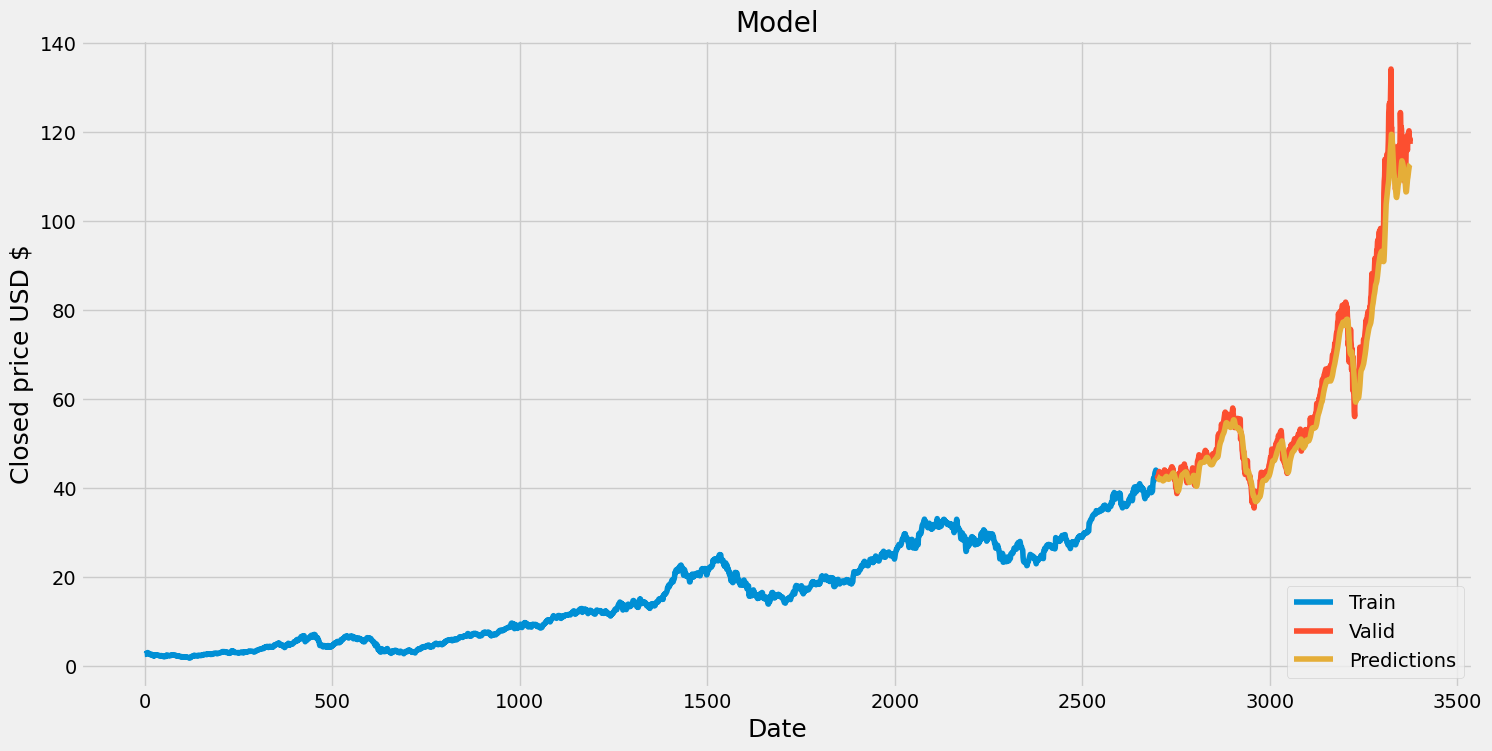

In [18]:
# Plotting the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closed price USD $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid' , 'Predictions'], loc = 'lower right')
plt.show()

## Comaparing data

In [ ]:
# Showing the value of actual price as well as the predicted

valid

,Close,Predictions
Date,,
2020-06-23,91.632500,91.546593
2020-06-24,90.014999,92.337723
2020-06-25,91.209999,92.949158
2020-06-26,88.407501,93.556229
2020-06-29,90.445000,93.727623
...,...,...
2021-10-26,149.320007,150.133865
2021-10-27,148.850006,150.520203
2021-10-28,152.570007,150.725815


## Obtaining result

In [ ]:
# Getting the quote and predicting for the next day

C_quote = web.DataReader(C_name, data_source='yahoo', start='2015-01-01', end= enddate)

# Create a new dataframe
new_df = C_quote.filter(['Close'])

# Taking last 60 days data and converting into array
last_60_days = new_df[-60:].values

# Scale the data b/w 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append last 60 days data
X_test.append(last_60_days_scaled)

# Converting into array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[151.57503]]


## Checking result - (CAN BE TREATED AS COMMENT)

In [ ]:
# Getting the quote and predicting for the next day - ACTUAL

C_quoteR = web.DataReader(C_name, data_source='yahoo', start='2021-11-02', end='2021-11-02')
print(C_quoteR['Close'])

Date
2021-11-01    148.960007
2021-11-02    150.755005
Name: Close, dtype: float64
